In [1]:
import serial, numpy as np, pandas as pd
from matplotlib import pyplot as plt

In [2]:
lines: list[list[str]] = []

In [3]:
data: dict[str, list[float]] = {"Time": [], "Output": [], "Error": [], "Control": []}

In [4]:
BAUDRATE = 9600

serial_port = "/dev/ttyUSB0"

ser = serial.Serial(serial_port, BAUDRATE, timeout=1)

try:
    while True:
        line = ser.readline().decode("utf-8").strip()
        if line:
            print(line)
            lines.append(line.split(","))
except KeyboardInterrupt:
    ser.close()

Tempo,Saida,Erro,Esforco
0.005004,0.977517,0.022483,0.380256
0.011328,0.928641,0.071359,1.198506
0.041452,0.972629,0.027371,0.428683
0.079932,0.982405,0.017595,0.256396
0.118412,0.977517,0.022483,0.336414
0.156892,0.972629,0.027371,0.414861
0.195372,0.972629,0.027371,0.409219
0.233852,0.972629,0.027371,0.404115
0.272332,0.972629,0.027371,0.399497
0.310812,0.977517,0.022483,0.312653
0.349292,0.962854,0.037146,0.558692
0.387772,0.977517,0.022483,0.303454
0.426252,0.972629,0.027371,0.385040
0.464732,0.977517,0.022483,0.299574
0.503212,0.972629,0.027371,0.381529
0.541692,0.987292,0.012708,0.131068
0.580172,0.972629,0.027371,0.382305
0.618652,0.967742,0.032258,0.462428
0.657132,0.977517,0.022483,0.292975
0.695612,0.972629,0.027371,0.375559
0.734100,0.977517,0.022483,0.290996
0.772572,0.977517,0.022483,0.291103
0.811052,0.938416,0.061584,0.952515
0.849532,0.977517,0.022483,0.276689
0.888012,0.972629,0.027371,0.360824
0.926492,0.972629,0.027371,0.360330
0.964972,0.977517,0.022483,0.277217
1.0

In [5]:
for line in lines:
    if line[0][0].isalpha(): # Headers
        continue
    try:
        data["Time"].append(float(line[0]))
        data["Output"].append(float(line[1]))
        data["Error"].append(float(line[2]))
        data["Control"].append(float(line[3]))
    except:
        continue

In [6]:
df = pd.DataFrame(data)

In [9]:
df.to_csv("data/step_controller.csv")

In [17]:
df.query("Time > 6 and Time < 10").head(50)

,Time,Output,Error,Control
157,6.033932,0.000000,0.000000,0.271156
158,6.072412,0.000000,0.000000,0.245329
159,6.110892,0.000000,0.000000,0.221963
160,6.149372,0.000000,0.000000,0.200822
161,6.187852,0.000000,0.000000,0.181694
162,6.226332,0.000000,0.000000,0.164389
163,6.264828,0.000000,0.000000,0.148731
164,6.303292,0.000000,0.000000,0.134565
165,6.341772,0.000000,0.000000,0.121749
166,6.380252,0.000000,0.000000,0.110153


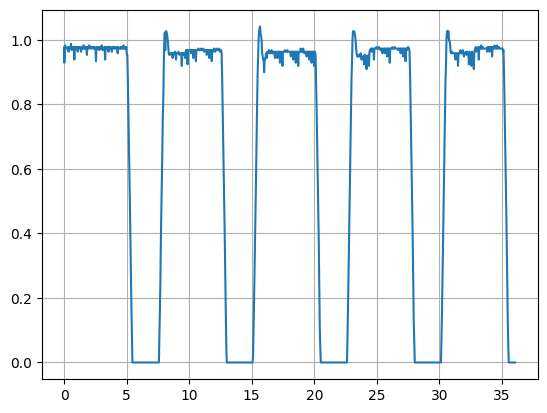

In [8]:
plt.plot(df["Time"], df["Output"])
plt.grid()